# Greg Betron - Fire Incidents

## Introduction

In this notebook, there is an analysis of the fire incidents in the city of Pittsburgh, as reported and responded to by the Pittsburgh Bureau of Fire, since the beginning of 2013. Less fire incidents in a neighborhood means that the neighborhood likely is up to better safety code.

### Metric
The incidents are grouped by neighborhood, and the number of incidents per neighborhood is counted. Neighborhoods with high fire incident counts per capita are considered to be worse than neighborhoods with less fire incidents per capita.

In [34]:
# First import libraries
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Analyze the data in the csv file using pandas, putting it into 'fireData'
fireData = pd.read_csv("FireData.csv", parse_dates=True)

Now, we are going to count the number of times there is a fire incident in each of the neighborhoods.

In [27]:
# This code looks into the pandas data set, and counts the number of rows for each individual 'neighborhood' column.
sortedFireData = fireData["neighborhood"].value_counts()
sortedFireData

Carrick                      289
Central Business District    274
South Side Flats             270
Squirrel Hill South          256
Hazelwood                    249
                            ... 
Ridgemont                     12
Mt. Oliver                    12
East Carnegie                 11
Regent Square                  9
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

Let's split the data into the top and bottom 5 values, and look at them on a graph.

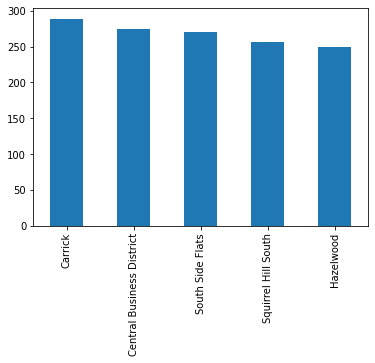

In [6]:
mostFires = sortedFireData.head()
leastFires = sortedFireData.tail()
pd.Series(mostFires).plot.bar()

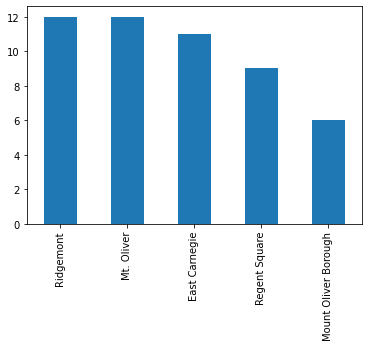

In [9]:
pd.Series(leastFires).plot.bar()

This is somewhat interesting, but it doesn't really tell us very well what the best/safest neighborhood. To get that information, we would need to compare the number of fires per capita. After all, it would make sense if a town with way more residents than another had more fires. So let's do that. First we will analyze the dataset of populations.

In [12]:
popData = pd.read_csv("PopulationData.csv", parse_dates=True)

In [22]:
newPopData = popData.drop(['_id','Id', 'Margin of Error; Total'], axis=1)
newPopData

,Neighborhood,Estimate; Total
0,Allegheny Center,1411.0
1,Allegheny West,343.0
2,Allentown,2558.0
3,Arlington,1852.0
4,Arlington Heights,272.0
...,...,...
86,Upper Lawrenceville,2754.0
87,West End,235.0
88,West Oakland,1717.0
89,Westwood,3537.0


That looks pretty good. We are almost ready to combine the datasets and determine what the least fires per capita are. But first, we will sort each neighborhood by population.

In [14]:
sortedNewPopData = newPopData.sort_values(by='Estimate; Total')
sortedNewPopData

,Neighborhood,Estimate; Total
21,Chateau,3.0
71,South Shore,12.0
57,North Shore,205.0
87,West End,235.0
78,St. Clair,270.0
...,...,...
15,Carrick,10122.0
76,Squirrel Hill North,11336.0
13,Brookline,13160.0
68,Shadyside,13562.0


As we can see, Chateau and South Shore have very few residents. As such, it wouldn't be very fair to compare the two to the others (more on this later). But for now, let's continue on. Now, we are going to focus on only the values in the population data. This will remove the neighborhood title, but that is fine since they are still in the same alphabetical order.

In [23]:
newPopData = newPopData['Estimate; Total'].squeeze()
newPopData

0     1411.0
1      343.0
2     2558.0
3     1852.0
4      272.0
       ...  
86    2754.0
87     235.0
88    1717.0
89    3537.0
90    1534.0
Name: Estimate; Total, Length: 91, dtype: float64

Now we make the fire data into a dataframe so it is easier to work with.

In [28]:
df = pd.DataFrame(sortedFireData)
df.head

<bound method NDFrame.head of                            neighborhood
Carrick                             289
Central Business District           274
South Side Flats                    270
Squirrel Hill South                 256
Hazelwood                           249
...                                 ...
Ridgemont                            12
Mt. Oliver                           12
East Carnegie                        11
Regent Square                         9
Mount Oliver Borough                  6

[91 rows x 1 columns]>

Then sort them into alphabetical order so the indices of the population and fire datasets match.

In [29]:
sortedFireData = sortedFireData.sort_index()
sortedFireData

Allegheny Center        62
Allegheny West          43
Allentown              127
Arlington               51
Arlington Heights       13
                      ... 
Upper Lawrenceville     52
West End                23
West Oakland            62
Westwood                28
Windgap                 23
Name: neighborhood, Length: 91, dtype: int64

Now we divide each number of fires with each population, giving us fires/person, or fires per capita!

In [25]:
firesPerCap = sortedFireData.div(newPopData.values)
firesPerCap.sort_index()

Allegheny Center       0.043940
Allegheny West         0.125364
Allentown              0.049648
Arlington              0.027538
Arlington Heights      0.047794
                         ...   
Upper Lawrenceville    0.018882
West End               0.097872
West Oakland           0.036109
Westwood               0.007916
Windgap                0.014993
Name: neighborhood, Length: 91, dtype: float64

Now that we've got our final dataset, let's look at it on a bar chart.

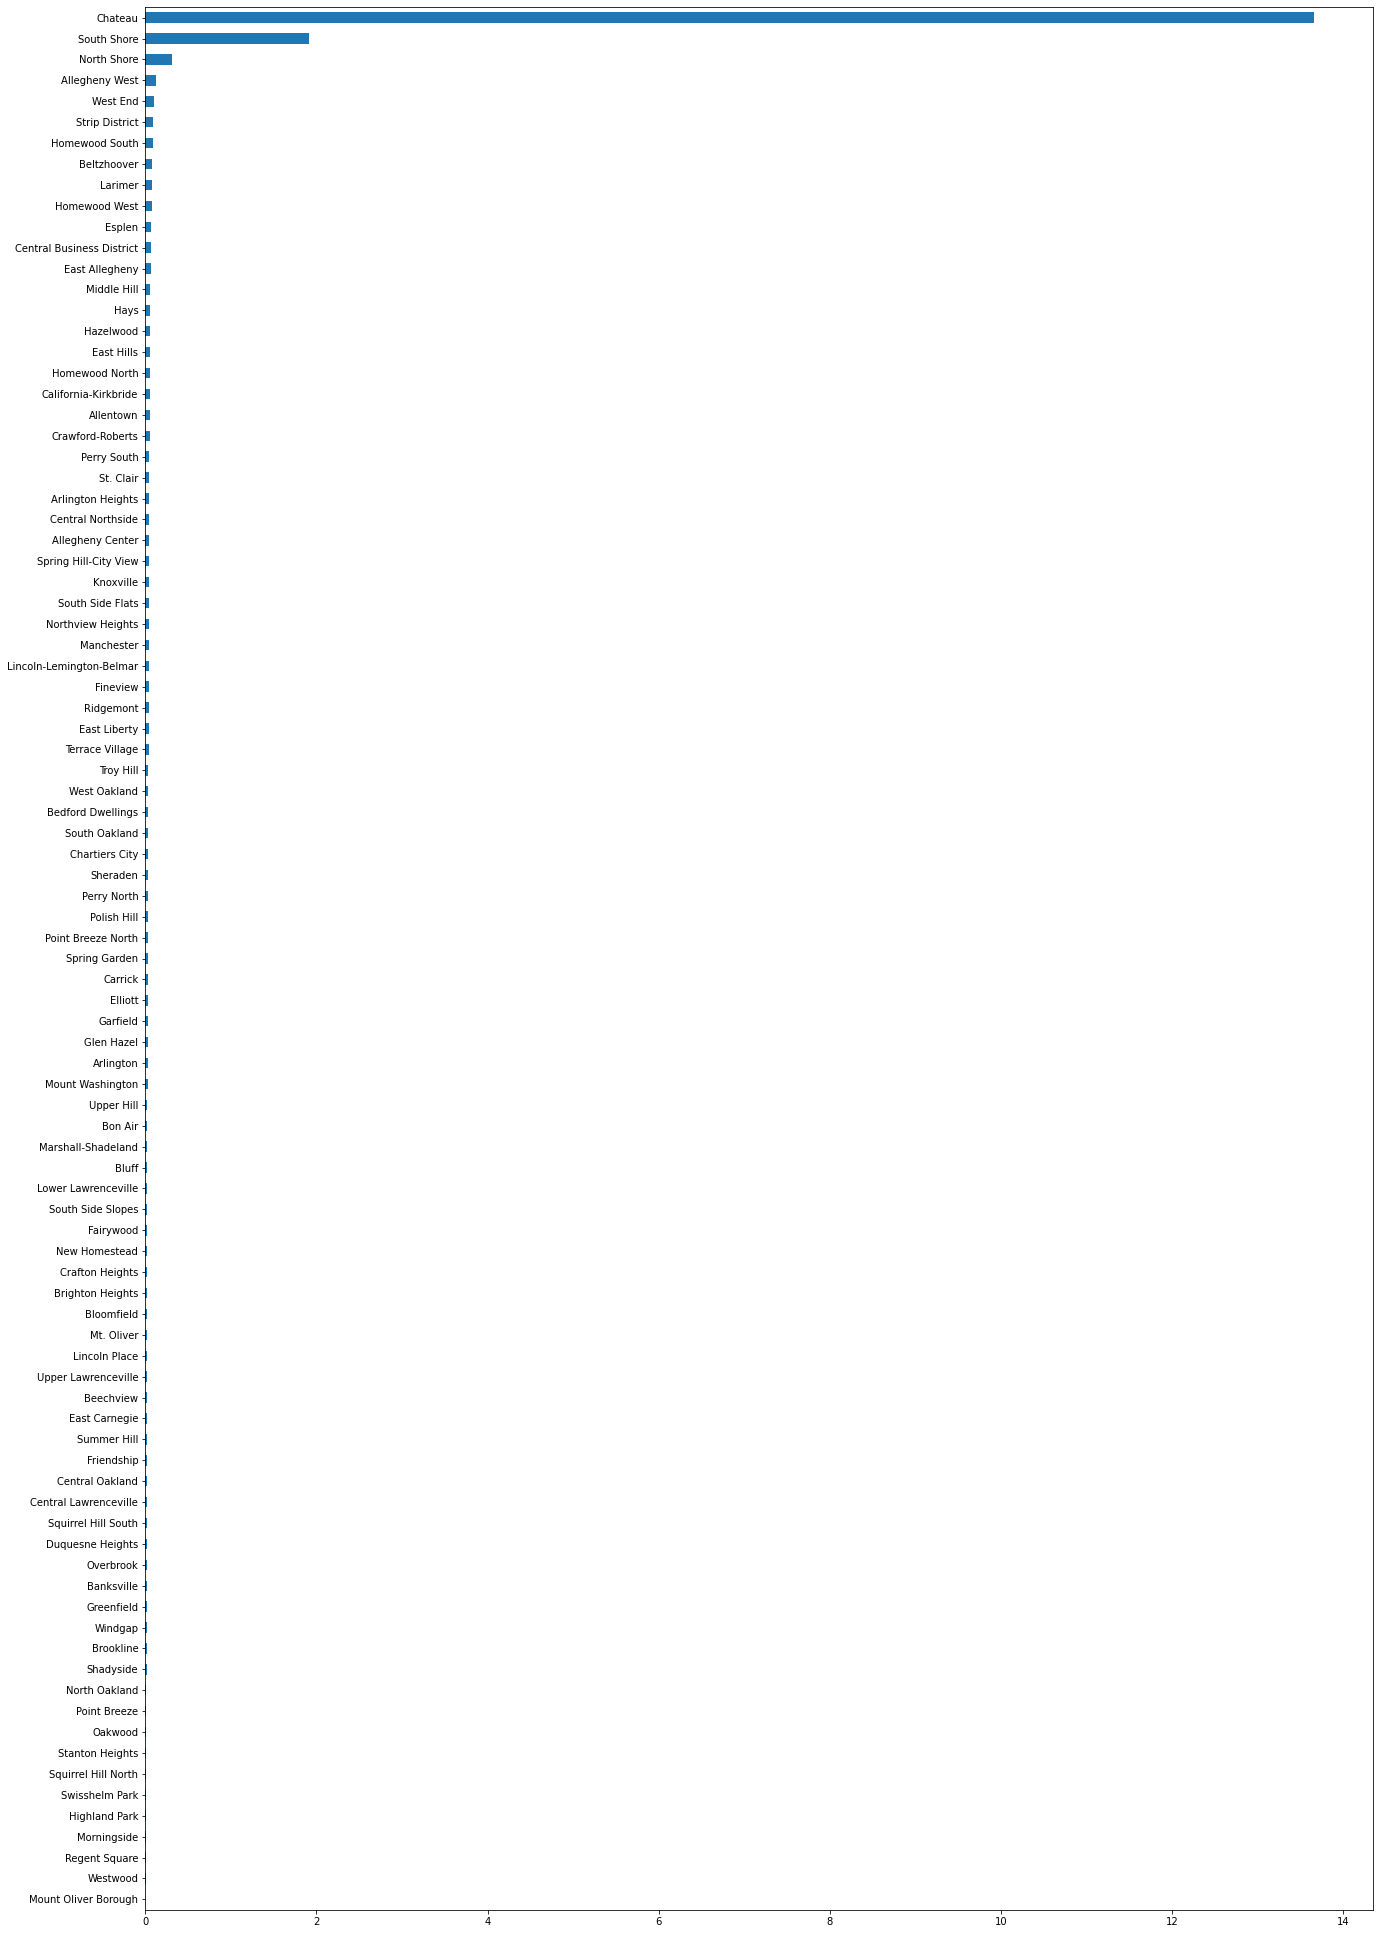

In [19]:
firesPerCap = firesPerCap.sort_values()
firesPerCap.plot(kind='barh', figsize=(22,35))

Not very surprisingly, Chateau and South shore having an extremely low recorded population skews the data set too heavily. As such, they will not be considered for this dataset. Lets look at the top 45 highest fires per capita not including those two.

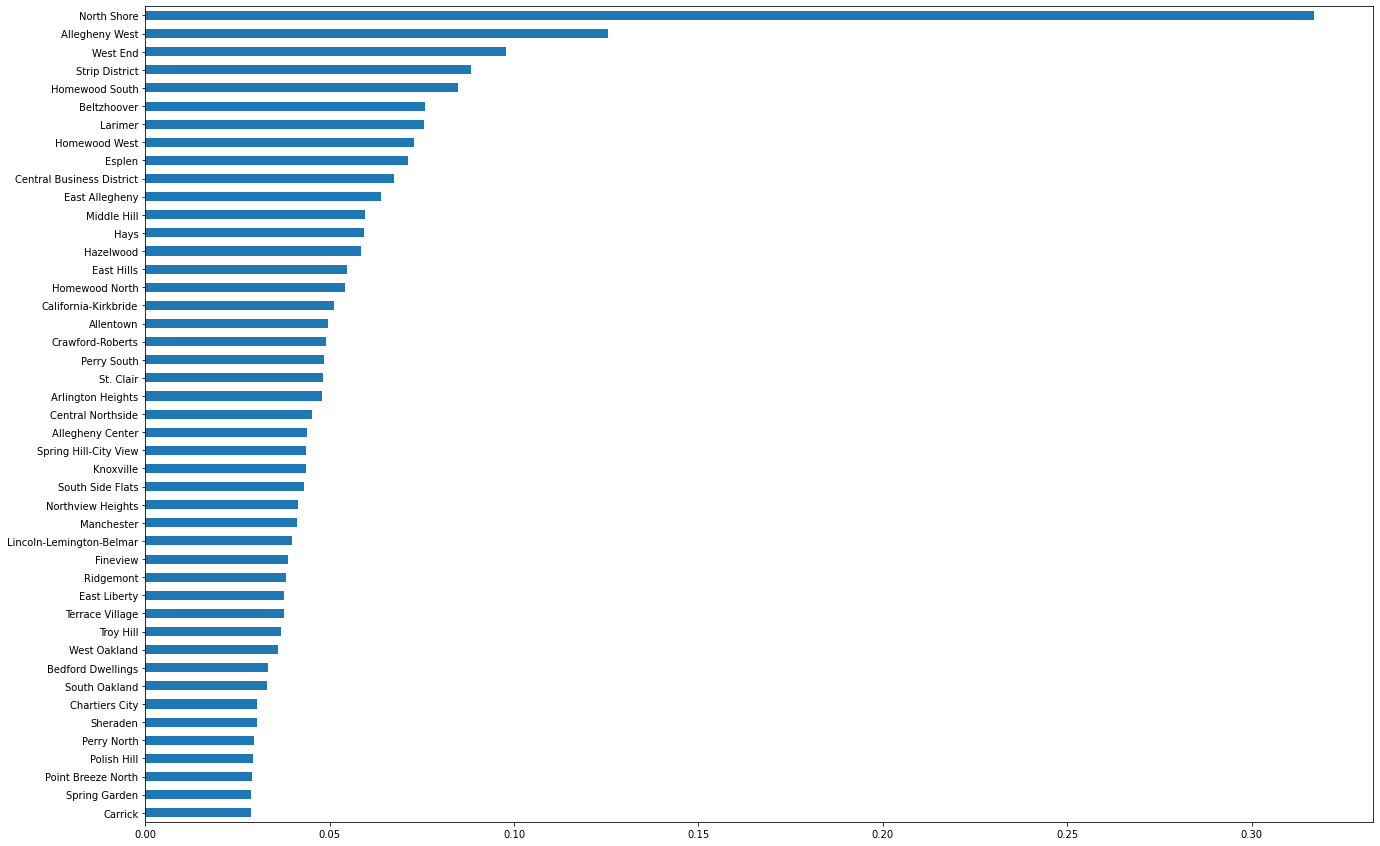

In [20]:
droppedFiresPerCap = firesPerCap.drop(['South Shore', 'Chateau'])
droppedFiresPerCap.tail(45).plot(kind='barh', figsize=(22,15))

And the bottom 44...

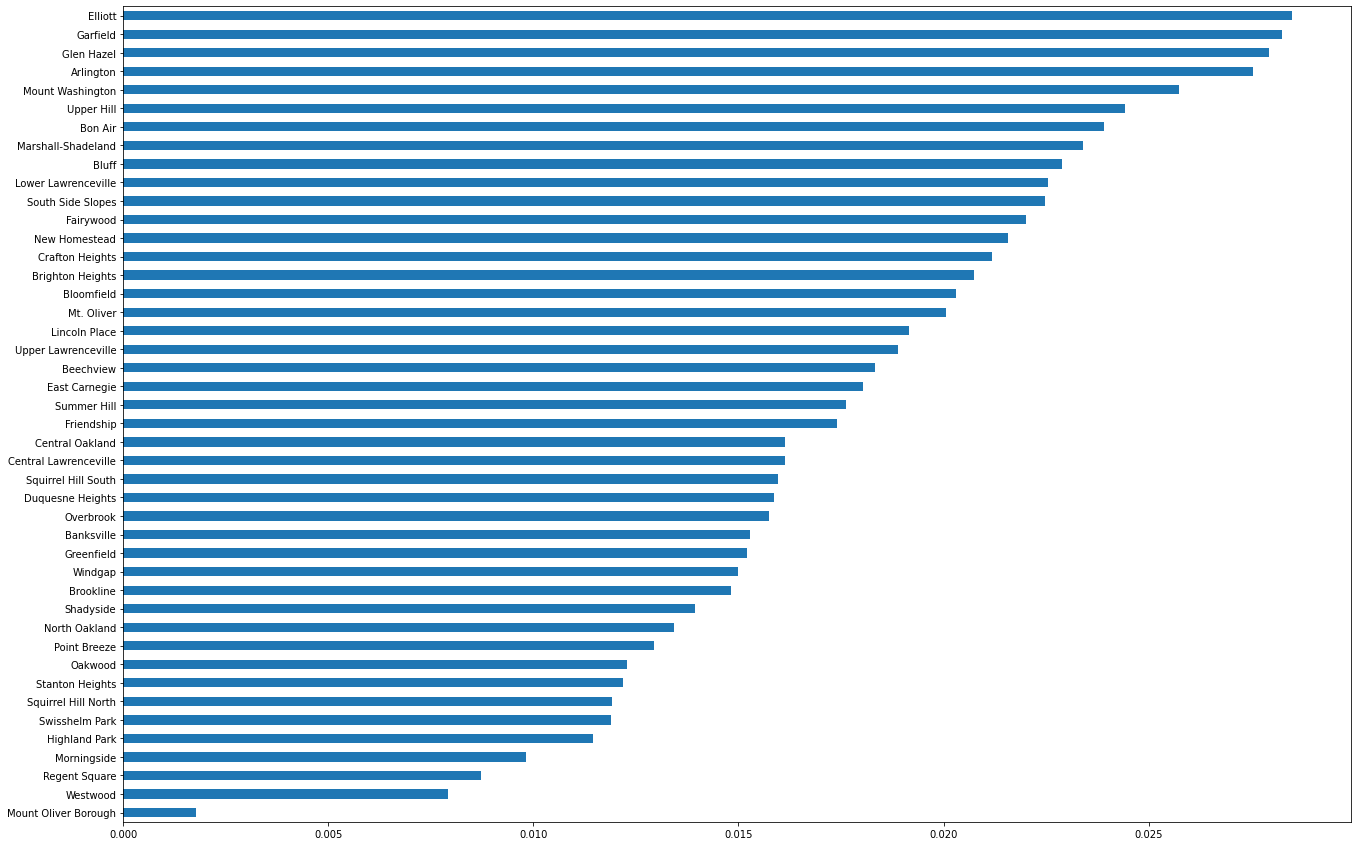

In [18]:
droppedFiresPerCap.head(44).plot(kind='barh', figsize=(22,15))

In [32]:
droppedFiresPerCap.sort_values()

Mount Oliver Borough    0.001765
Westwood                0.007916
Regent Square           0.008712
Morningside             0.009810
Highland Park           0.011454
                          ...   
Homewood South          0.084798
Strip District          0.088353
West End                0.097872
Allegheny West          0.125364
North Shore             0.317073
Name: neighborhood, Length: 89, dtype: float64

So, there are the top 5 and bottom 5 fires per capita (not including outliers).
The top 5 safest based on fires is:
1. Mount Oliver Borough
2. Westwood
3. Regent Square
4. Morningside
5. Highland Park

The bottom 5 (least safe) based on fires is:
1. North Shore
2. Allegheney West
3. West End
4. Strip District
5. Homewood South